# Practical Work 7 - SVM

## Students
- Flavia Pittet
- Fabio Vitali


## Exercise - 1 Digit classification system using different SVM classifiers

### a. Getting the training and test sample sets from the MNIST database

(same code as PW02)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report

- We will be using the MNIST dataset from zalando https://github.com/zalandoresearch/fashion-mnist

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


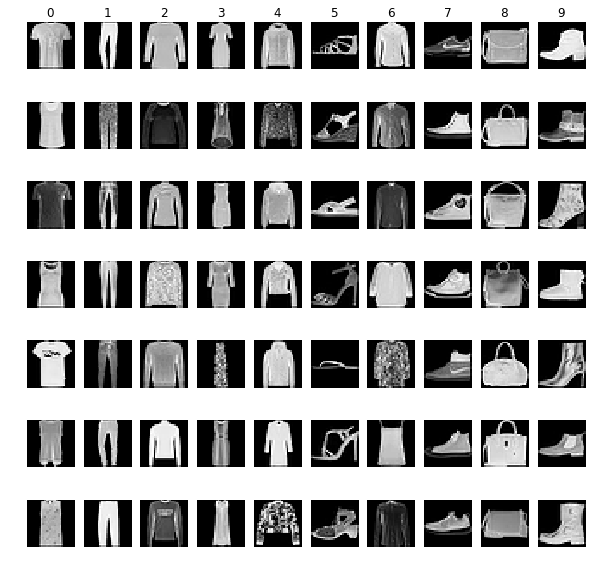

Subsampled training data shape:  (1000, 28, 28)
Subsampled training labels shape:  (1000,)
Subsampled test data shape:  (500, 28, 28)
Subsampled test labels shape:  (500,)


In [2]:
# Run some setup code for this notebook.

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# This is a method to read the MNIST dataset from a ROOT directory
def load_MNIST(ROOT):
  '''load all of mnist
  training set first'''
  Xtr = []
  train = pd.read_csv(os.path.join(ROOT, 'fashion-mnist_train.csv'))
  X = np.array(train.drop('label', axis=1))
  Ytr = np.array(train['label'])
  # With this for-loop we give the data a shape of the actual image (28x28)
  # instead of the shape in file (1x784)
  for row in X:
      Xtr.append(row.reshape(28,28))
  # load test set second
  Xte = []
  test = pd.read_csv(os.path.join(ROOT, 'fashion-mnist_test.csv'))
  X = np.array(test.drop('label', axis=1))
  Yte = np.array(test['label'])
  # same reshaping
  for row in X:
      Xte.append(row.reshape(28,28))
  
  return np.array(Xtr), np.array(Ytr), np.array(Xte), np.array(Yte)


# Load the raw MNIST data.
mnist_dir = './data'   # TODO: Fabio to update
X_train, y_train, X_test, y_test = load_MNIST(mnist_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# Now let's visualise some of the images
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


# Subsample the data for more efficient code execution in this exercise. We do this to make it go faster. 
# When you will have completed the whole notebook, you can run it again on a larger (or total) dataset 
# and observe the difference in terms of accuracy (and speedup).
num_training = 1000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

# TODO: sanity check: write code to print out the size of the subsampled training and test data.
print('Subsampled training data shape: ', X_train.shape)
print('Subsampled training labels shape: ', y_train.shape)
print('Subsampled test data shape: ', X_test.shape)
print('Subsampled test labels shape: ', y_test.shape)


### b. Classification of digits based on raw pixel values using SVM and different kernels

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], -1)) # when reshaping, -1 means "infer target dims from orig dims
X_test = np.reshape(X_test, (X_test.shape[0], -1)) 

In [4]:
def optimize_SVM(params, datas, y, cv_folds=10, verbose=5):
    grid = GridSearchCV(SVC(cache_size=7000, max_iter=400), cv=cv_folds, n_jobs=-1,
                        param_grid=params,
                        verbose=verbose)
    grid.fit(datas, y)
    
    return grid

In [5]:
rbf = optimize_SVM({
                              'C': np.logspace(-2, 6, 9),
                              'gamma': np.logspace(-6, 2, 9),
                              'kernel': ['rbf']
                          },
                          X_train, y_train,
                          cv_folds=7)


Fitting 7 folds for each of 81 candidates, totalling 567 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 567 out of 567 | elapsed: 12.4min finished


In [7]:
linear = optimize_SVM({
                              'C': np.logspace(-2, 8, 11),
                              'kernel': ['linear']
                          },
                          X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  1.2min finished
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [8]:
poly = optimize_SVM({
                              'C': np.logspace(-1, 4, 6),
                              'degree': range(1,4,1),
                              'kernel': ['poly']
                          },
                          X_train, y_train,
                          cv_folds=7)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:  1.2min finished
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [9]:
def print_results(system):
    predicted = system.predict(X_test)
    print(system.best_estimator_)
    print('Score: {}'.format(f1_score(y_test, predicted, average='weighted')))
    print(confusion_matrix(y_test, predicted))
    print(classification_report(predicted, y_test))

print_results(rbf)
print_results(linear)
print_results(poly)

SVC(C=10.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-06, kernel='rbf',
  max_iter=400, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Score: 0.7782510888501757
[[31  0  2  3  0  0 10  0  7  0]
 [ 0 37  0  1  0  0  1  0  1  0]
 [ 1  0 34  0 13  0  8  0  7  0]
 [ 1  0  0 43  0  0  0  0  2  0]
 [ 0  0  4  4 39  0  6  0  2  0]
 [ 0  0  0  0  0 42  0  1  8  1]
 [ 6  0  1  2  5  0 31  0  4  0]
 [ 0  0  0  0  0  1  0 45  0  6]
 [ 0  0  0  0  0  0  1  0 42  0]
 [ 0  0  0  0  0  0  0  1  1 45]]
             precision    recall  f1-score   support

          0       0.58      0.79      0.67        39
          1       0.93      1.00      0.96        37
          2       0.54      0.83      0.65        41
          3       0.93      0.81      0.87        53
          4       0.71      0.68      0.70        57
          5       0.81      0.98      0.88        43
          6       0.63      0.54      0.58  

### d. Analysis of the results with the best SVM classifier

- **a) Which kernel and parameters were used ?**

The best classifier is the polynomial kernel with the following parameters:

SVC(C=0.1, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=400, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- **b) Which digit classes are the best/worse recognized against which ? Why ?**

The labels 0 and 6 (T-shirts and shirts) confuse the classifier the most since they look a lot alike.

The trousers (label 1) have the best precsion among all the labels. No other clothe in the set looks like trousers.

- **c) What is the impact of the sizes of the training and test sets on the classification performance?**

With a test set size of 500, here are the F1-score of our best classifier for different training set size:

|Size of training set| Score |
|----|----|
|1000| 78.5%|
|500|75.2%|
|200| 73.7%|
